# LONGITUDINAL CHARACTERISTICS VECTOR

This Jupyter Notebook contains main functions to analyse seasonality of ASVs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

subject_cmap = {'male':'#d36135', 
        'female':'#ffb400' ,
        'donorA':'#227c9d', 
        'donorB':'#7fb069'}

In [2]:
df_seasonal = pd.read_csv('./data/ts_charactericstics_tables/LONGITUDINAL_CHARACTERISTICS_DF.csv')
explained_fft_df = pd.read_csv('./data/ts_charactericstics_tables/explained_fft_df.csv')

In [3]:
df_seasonal = df_seasonal.rename({'seasonal_reconstruction_score': 'seasonal_reconstruction_score_6modes'}, axis=1)

## Number of modes vs seasonal reconstruction score

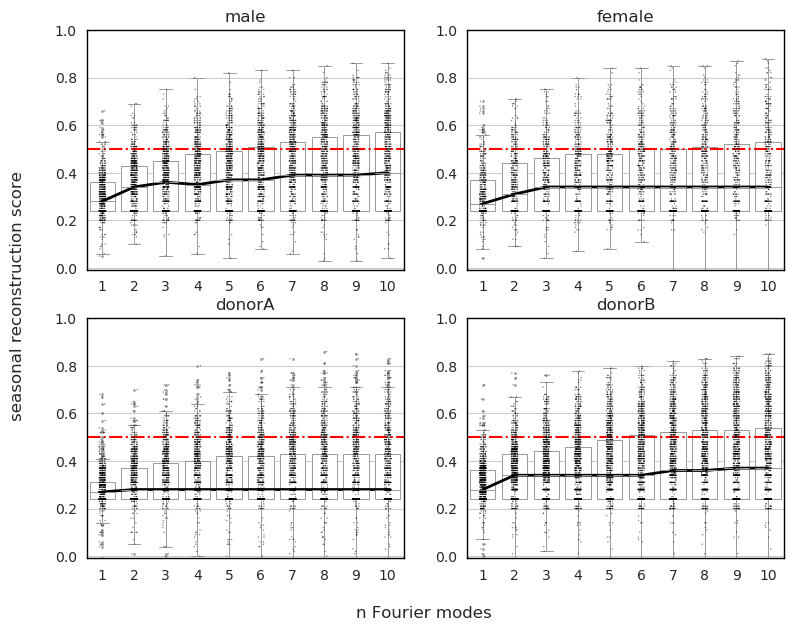

In [6]:
loc = [[0, 0], [0, 1], [1, 0], [1, 1]]

box_kwargs = {'color':'white', 'linewidth':.7, 'fliersize':1}
s_kwargs = {'s':1, 'color':'k', 'alpha':0.5}

fig, axes = plt.subplots(2, 2, figsize = (9, 7))
for subject, l in zip(subject_cmap.keys(), loc):
    
    data = explained_fft_df[explained_fft_df['subject'] == subject]
    data_grouped = data.groupby(by = ['n_modes', 'subject']).median().reset_index()
    
    sns.boxplot(x = data.n_modes, 
                y = data['seasonal_reconstruction_score'], 
                ax=axes[l[0], l[1]], **box_kwargs)

    sns.stripplot(x = data.n_modes, 
                y = data['seasonal_reconstruction_score'], 
                ax=axes[l[0], l[1]], **s_kwargs)
    
    axes[l[0], l[1]].plot(data_grouped.index.values, data_grouped['seasonal_reconstruction_score'].values, 'k-', lw=2)
    
    axes[l[0], l[1]].axhline(0.5, color='r', linestyle = '-.')
    axes[l[0], l[1]].set_xlabel('')
    axes[l[0], l[1]].set_ylabel('')
    axes[l[0], l[1]].set_title(subject)
    axes[l[0], l[1]].set_ylim([-.01, 1])
    
fig.text(0.5, 0.04, 'n Fourier modes', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'seasonal reconstruction score', va='center', rotation='vertical', fontsize=12)

### How many Fourier seasonalities we need to achieve seasonal reconstruction score of 0.5

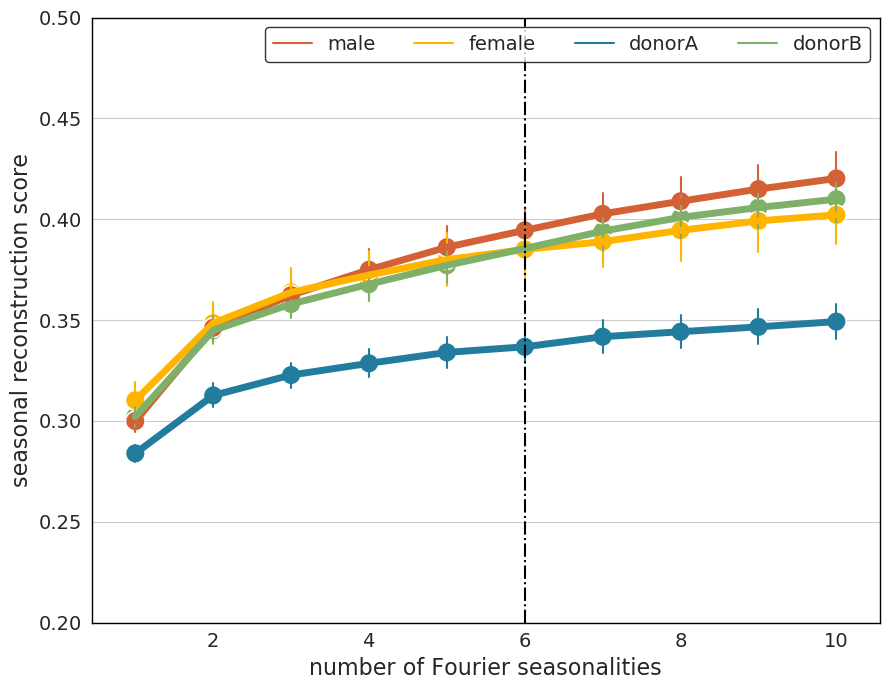

In [19]:
df = explained_fft_df.groupby(by = ['n_modes', 'subject']).mean().reset_index()

plt.figure(figsize = (9, 7))
sns.lineplot(data=explained_fft_df, x = 'n_modes', y = 'seasonal_reconstruction_score', hue = 'subject', lw=5, err_style = 'bars', palette = subject_cmap)
sns.scatterplot(data=df, x = 'n_modes', y = 'seasonal_reconstruction_score', hue = 'subject', s=200, palette = subject_cmap, legend=False)

plt.xlabel('number of Fourier seasonalities', fontsize=16)
plt.ylabel('seasonal reconstruction score', fontsize=16)

plt.legend(edgecolor='k', ncol = 4, fontsize=14)
plt.grid(axis='x')
plt.axvline(6, linestyle = '-.', color='k')
plt.ylim([0.2, 0.5])
plt.xticks(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

### What are dominant sesonalities

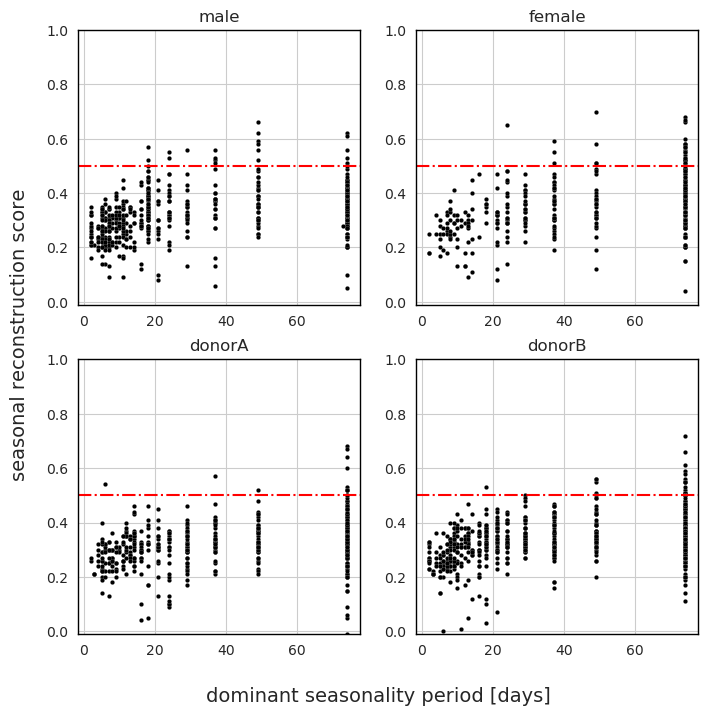

In [21]:
loc = [[0, 0], [0, 1], [1, 0], [1, 1]]

fig, axes = plt.subplots(2, 2, figsize = (8, 8))
for subject, l in zip(subject_cmap.keys(), loc):
    
    data = df_seasonal[df_seasonal['subject'] == subject]

    sns.scatterplot(x = data['dominant_seasonality'], 
                    y = data['dominant_mode_score'], 
                    s=10,
                    color='k',
                    edgecolor='w',
                    linewidth= .1,
                    ax=axes[l[0], l[1]])
    
    axes[l[0], l[1]].axhline(0.5, color='r', linestyle = '-.')
    axes[l[0], l[1]].set_xlabel('')
    axes[l[0], l[1]].set_ylabel('')
    axes[l[0], l[1]].set_title(subject)
    axes[l[0], l[1]].set_ylim([-.01, 1])

fig.text(0.5, 0.04, 'dominant seasonality period [days]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'seasonal reconstruction score', va='center', rotation='vertical', fontsize=14)

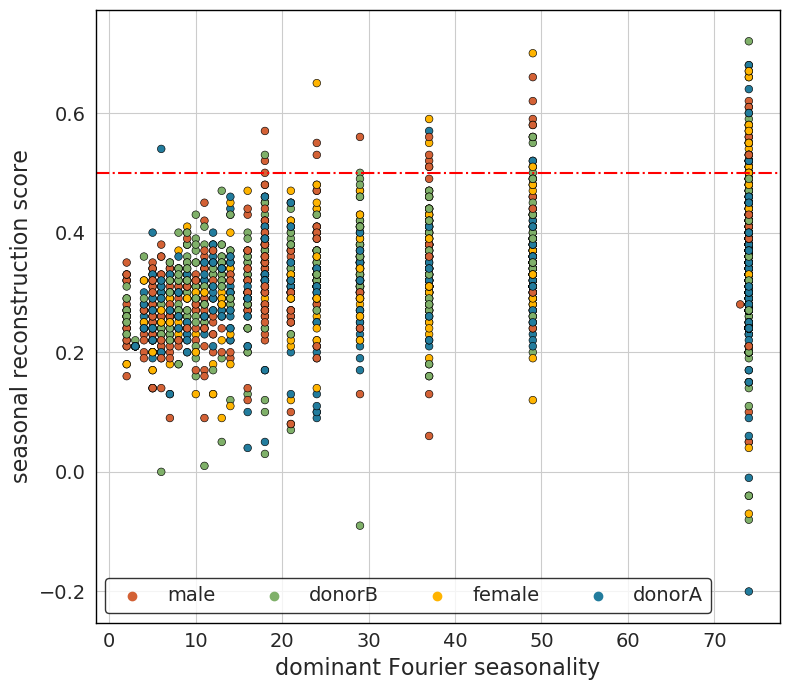

In [26]:
# the same but together
plt.figure(figsize = (8, 7))
sns.scatterplot(data=df_seasonal, 
                x = 'dominant_seasonality', 
                y='dominant_mode_score',
                hue = 'subject', 
                palette = subject_cmap,
                s=30, edgecolor='k')
plt.axhline(0.5, linestyle= '-.', color='red')
plt.legend(edgecolor='k', ncol = 4, fontsize=14)
plt.xlabel('dominant Fourier seasonality', fontsize=16)
plt.ylabel('seasonal reconstruction score', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

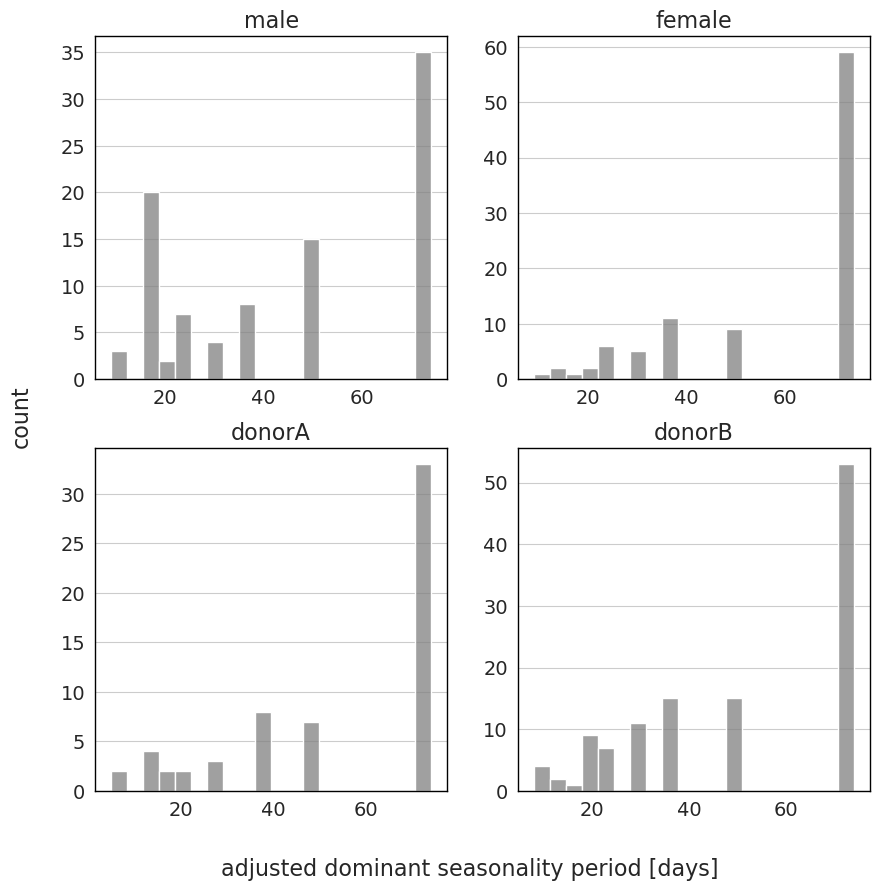

In [32]:
#the same but as a histplot
loc = [[0, 0], [0, 1], [1, 0], [1, 1]]

fig, axes = plt.subplots(2, 2, figsize = (10, 10))
for subject, l in zip(subject_cmap.keys(), loc):
    
    data = df_seasonal[(df_seasonal['subject'] == subject)]
    data = data[data['dominant_seasonality_adj'] > 0]
    sns.histplot(data['dominant_seasonality_adj'], ax=axes[l[0], l[1]], color='grey', bins=20)
    axes[l[0], l[1]].set_xlabel('')
    axes[l[0], l[1]].set_ylabel('')
    axes[l[0], l[1]].set_title(subject, fontsize=16)
    axes[l[0], l[1]].grid(axis='x')
    axes[l[0], l[1]].tick_params(axis='both', which='major', labelsize=14)
    axes[l[0], l[1]].tick_params(axis='both', which='minor', labelsize=14)


fig.text(0.5, 0.04, 'adjusted dominant seasonality period [days]', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'count', va='center', rotation='vertical', fontsize=16)


### How many ASV are seasonal within each subject

/home/MCB/zkarwowska/anaconda3/envs/basic_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/MCB/zkarwowska/anaconda3/envs/basic_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


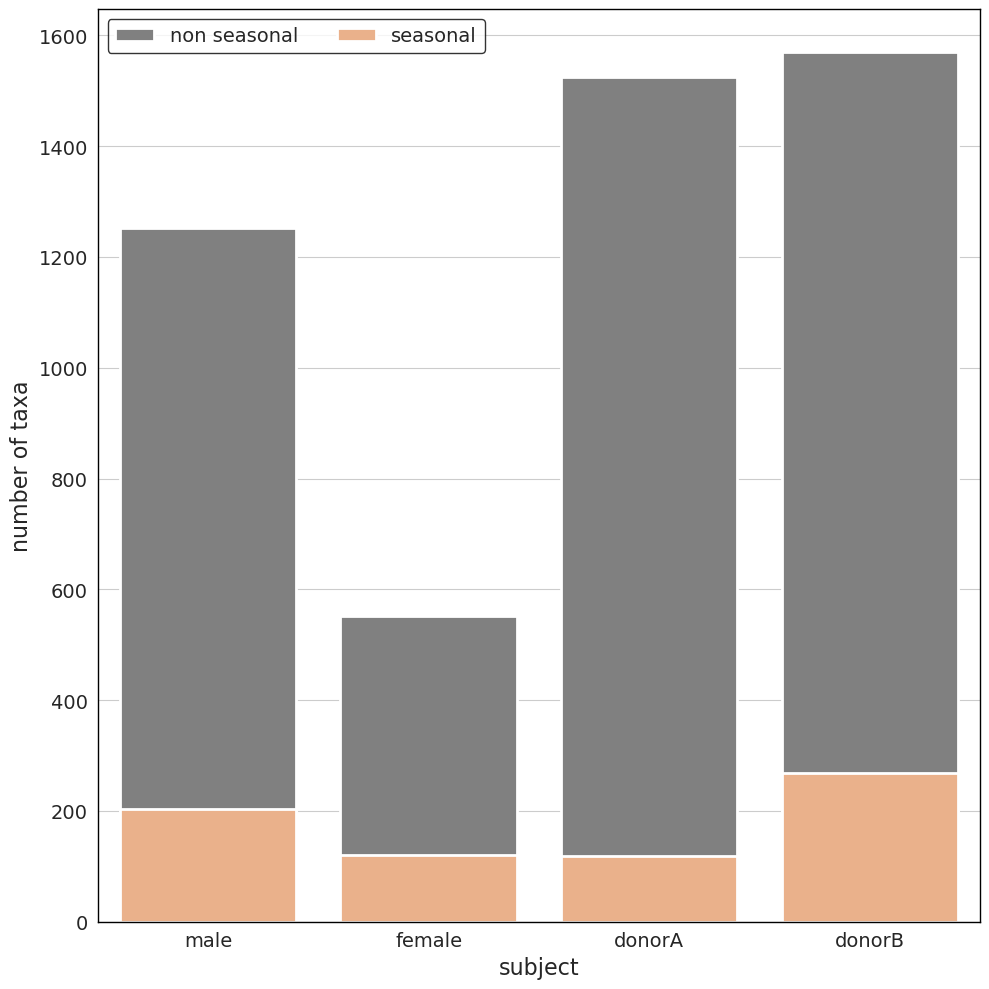

In [37]:
#define bacteria that are seasonal
modes_saturation = explained_fft_df[explained_fft_df['n_modes'] == 6]
modes_saturation['seasonal'] = np.where(modes_saturation['seasonal_reconstruction_score'] > 0.5, 1, 0)
modes_saturation['bacteria'] = np.where(modes_saturation['n_modes'] == 6, 1, 0)

seasonal_bacteria_df = modes_saturation.groupby(by = ['subject']).sum()
seasonal_bacteria_df = seasonal_bacteria_df[['seasonal', 'bacteria']]
seasonal_bacteria_df = seasonal_bacteria_df.reindex(['male', 'female', 'donorA', 'donorB'])


plt.figure(figsize = (10, 10))
sns.barplot(x = seasonal_bacteria_df.index, y=seasonal_bacteria_df['bacteria'], color='grey', edgecolor='w', lw=2, label = 'non seasonal')
sns.barplot(x = seasonal_bacteria_df.index, y=seasonal_bacteria_df['seasonal'], color='#faae7b', edgecolor='w', lw=2, label = 'seasonal')
plt.xlabel('subject', fontsize=16)
plt.ylabel('number of taxa', fontsize=16)
plt.legend(edgecolor='k', ncol = 2, fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

### Seasonality vs flatness score

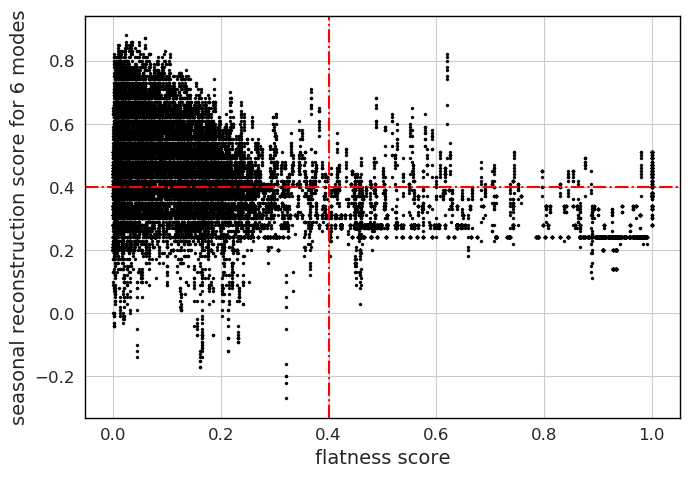

In [50]:
df = pd.merge(explained_fft_df, df_seasonal[['feature', 'subject', 'flattness_score']], on = ['feature', 'subject'])

plt.figure(figsize = (7, 5))
sns.scatterplot(x = df.flattness_score, y = df['seasonal_reconstruction_score'], color='k', s=5, alpha = 1, edgecolor='k')
plt.xlabel('flatness score', fontsize=14)
plt.ylabel('seasonal reconstruction score for 6 modes', fontsize=14)
plt.axhline(0.4, linestyle = '-.', color='r')
plt.axvline(0.4, linestyle = '-.', color='r')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

### Being seasonal vs being white noise

/home/MCB/zkarwowska/anaconda3/envs/basic_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/MCB/zkarwowska/anaconda3/envs/basic_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/MCB/zkarwowska/anaconda3/envs/basic_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a depre

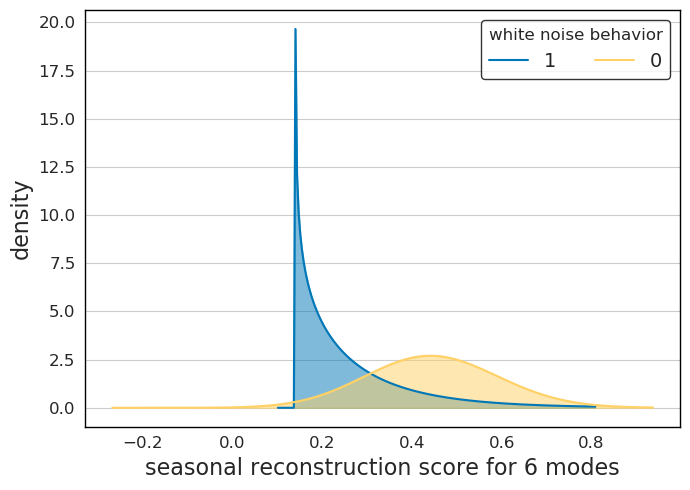

In [49]:
modes_saturation = explained_fft_df[explained_fft_df['n_modes'] == 6]
modes_saturation['seasonal'] = np.where(modes_saturation['seasonal_reconstruction_score'] > 0.5, 1, 0)
modes_saturation['bacteria'] = np.where(modes_saturation['n_modes'] == 6, 1, 0)

seasonal_features_df = modes_saturation[['feature', 'seasonal', 'subject', 'seasonal_reconstruction_score']]
df = pd.merge(seasonal_features_df, df_seasonal, on = ['feature', 'subject'])

plt.figure(figsize = (7, 5))

ax = sns.distplot(x = df[df.white_noise_binary == 1]['seasonal_reconstruction_score'], 
             fit_kws={"color":"#0077b6"}, kde=False,
             fit=stats.gamma, hist=None, label="1")

ax = sns.distplot(x = df[df.white_noise_binary == 0]['seasonal_reconstruction_score'], 
             fit_kws={"color":"#ffd166"}, kde=False,
             fit=stats.gamma, hist=None, label="0")

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="#0077b6", alpha=0.5)
ax.fill_between(x2,y2, color="#ffd166", alpha=0.5)
plt.grid(axis='x')
plt.xlabel('seasonal reconstruction score for 6 modes', fontsize=16)
plt.ylabel('density', fontsize=16)

plt.legend(title = 'white noise behavior', edgecolor='k', ncol=2, fontsize=14)
plt.rcParams['legend.title_fontsize'] = 'large'

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)